<a href="https://colab.research.google.com/github/nuzhatfaizah321/Projects/blob/main/MIS453_Faizah_Nuzhat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV

In [39]:
# Load the uploaded dataset
data = pd.read_csv('Car_Price_Prediction.csv')

# Check the first few rows
data.head()


,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657


In [40]:
data.shape

(1000, 8)

In [41]:
# Check Null Values
data.isnull().values.any()

np.False_

In [42]:
print("There is {} missing values in data frame".format(data.isnull().sum().sum()))

There is 0 missing values in data frame


In [43]:
len(data.columns)

8

In [44]:
data.describe()

,Year,Engine Size,Mileage,Price
count,1000.000000,1000.000000,1000.00000,1000.000000
mean,2010.688000,2.798300,97192.48700,25136.615530
std,6.288577,1.024137,59447.31576,5181.401368
min,2000.000000,1.000000,56.00000,6704.953524
25%,2005.000000,1.900000,44768.75000,21587.878370
50%,2011.000000,2.800000,94411.50000,25189.325247
75%,2016.000000,3.700000,148977.75000,28806.368974
max,2021.000000,4.500000,199867.00000,41780.504635


Exploratory Data Analysis (EDA) check for missing values, outliers, distributions, and correlations.

In [45]:
# Define columns to plot: exclude categorical columns
numerical_columns = ['Year', 'Engine Size', 'Mileage', 'Price']

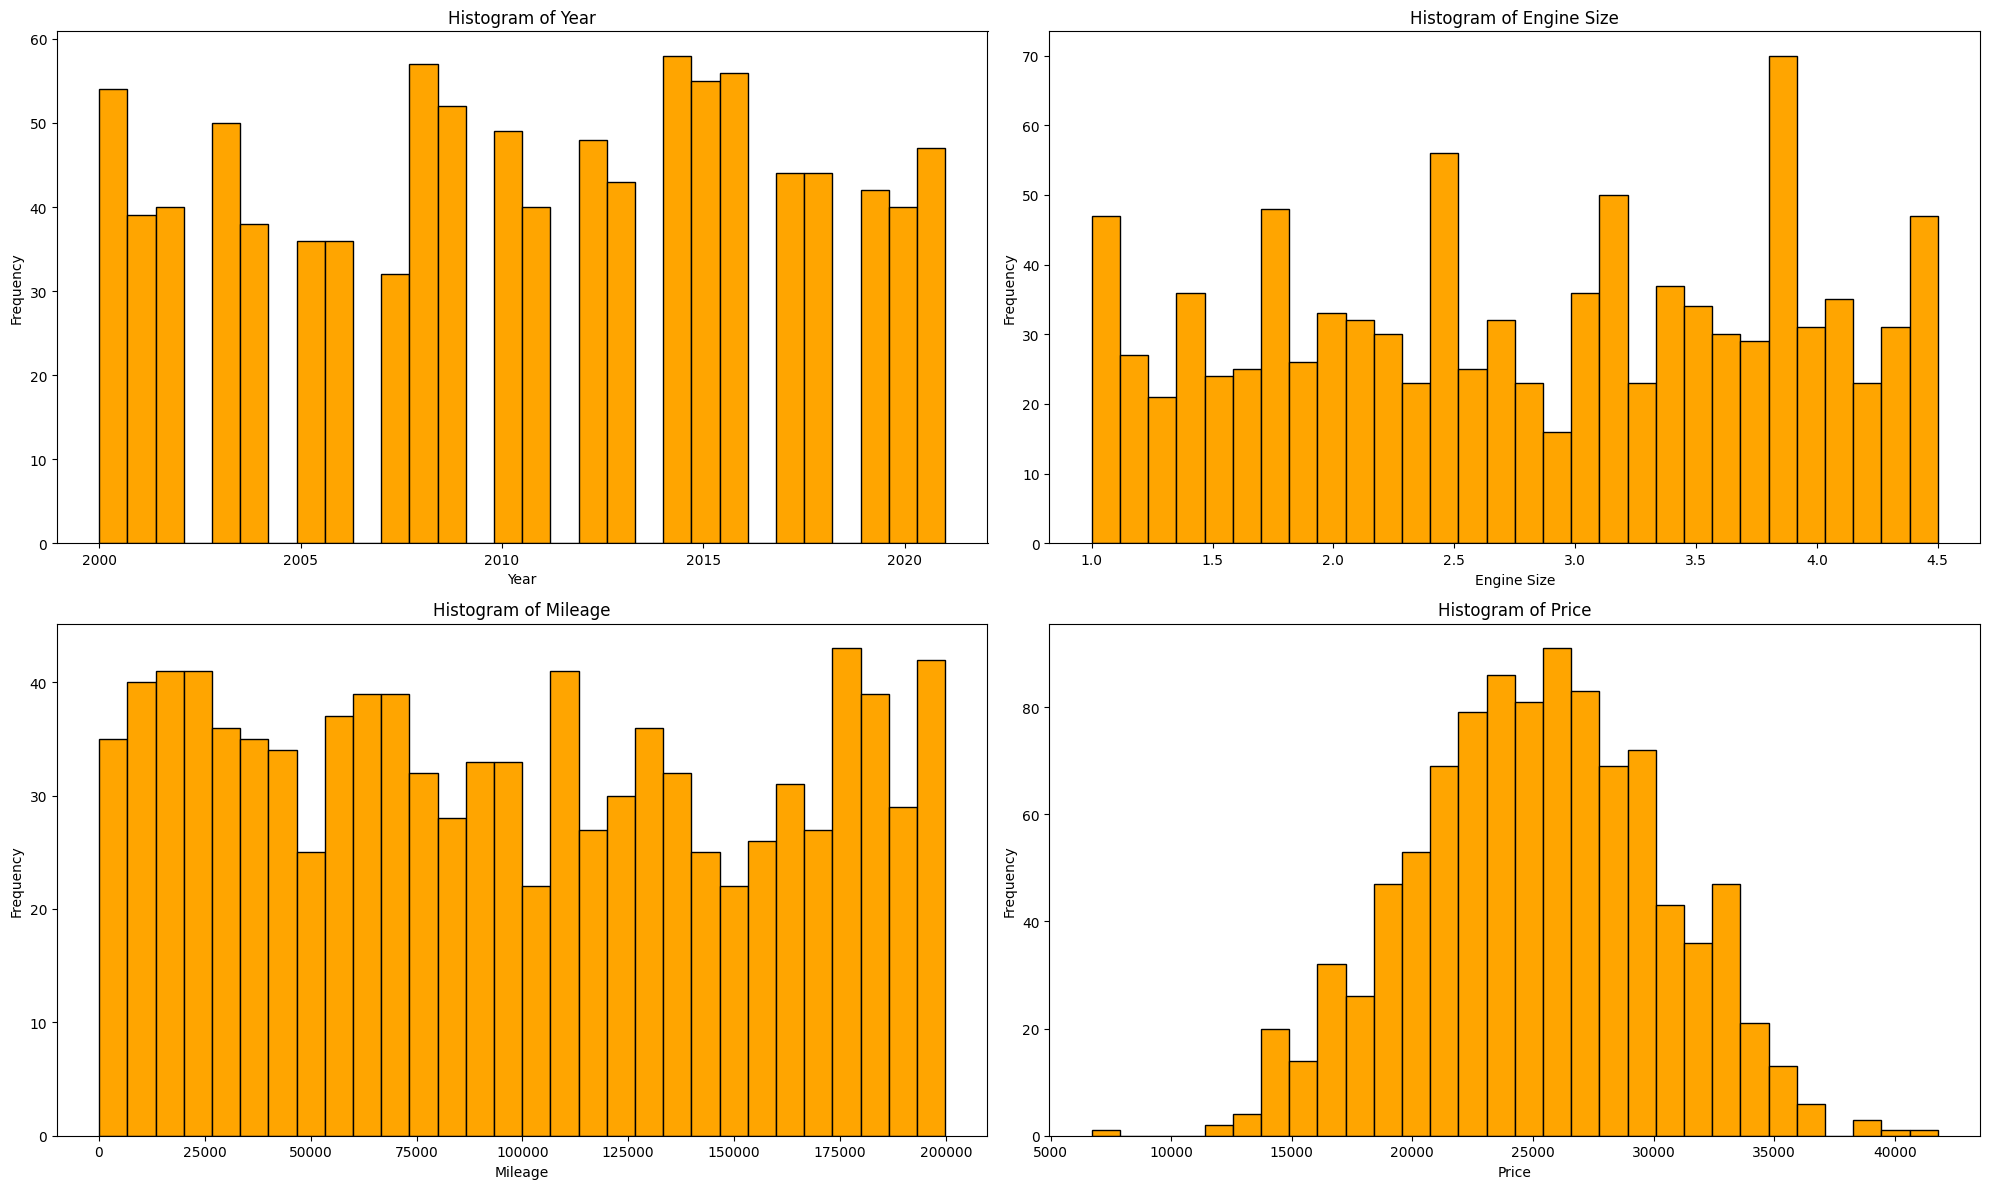

In [46]:
# Create a 2x2 grid for the plots
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Flatten the axes array to easily iterate over it
axes = axes.flatten()

# Loop through the numerical columns and plot the histograms and column charts
for i, column in enumerate(numerical_columns):
    # Plot histogram
    axes[i].hist(data[column], bins=30, color='orange', edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

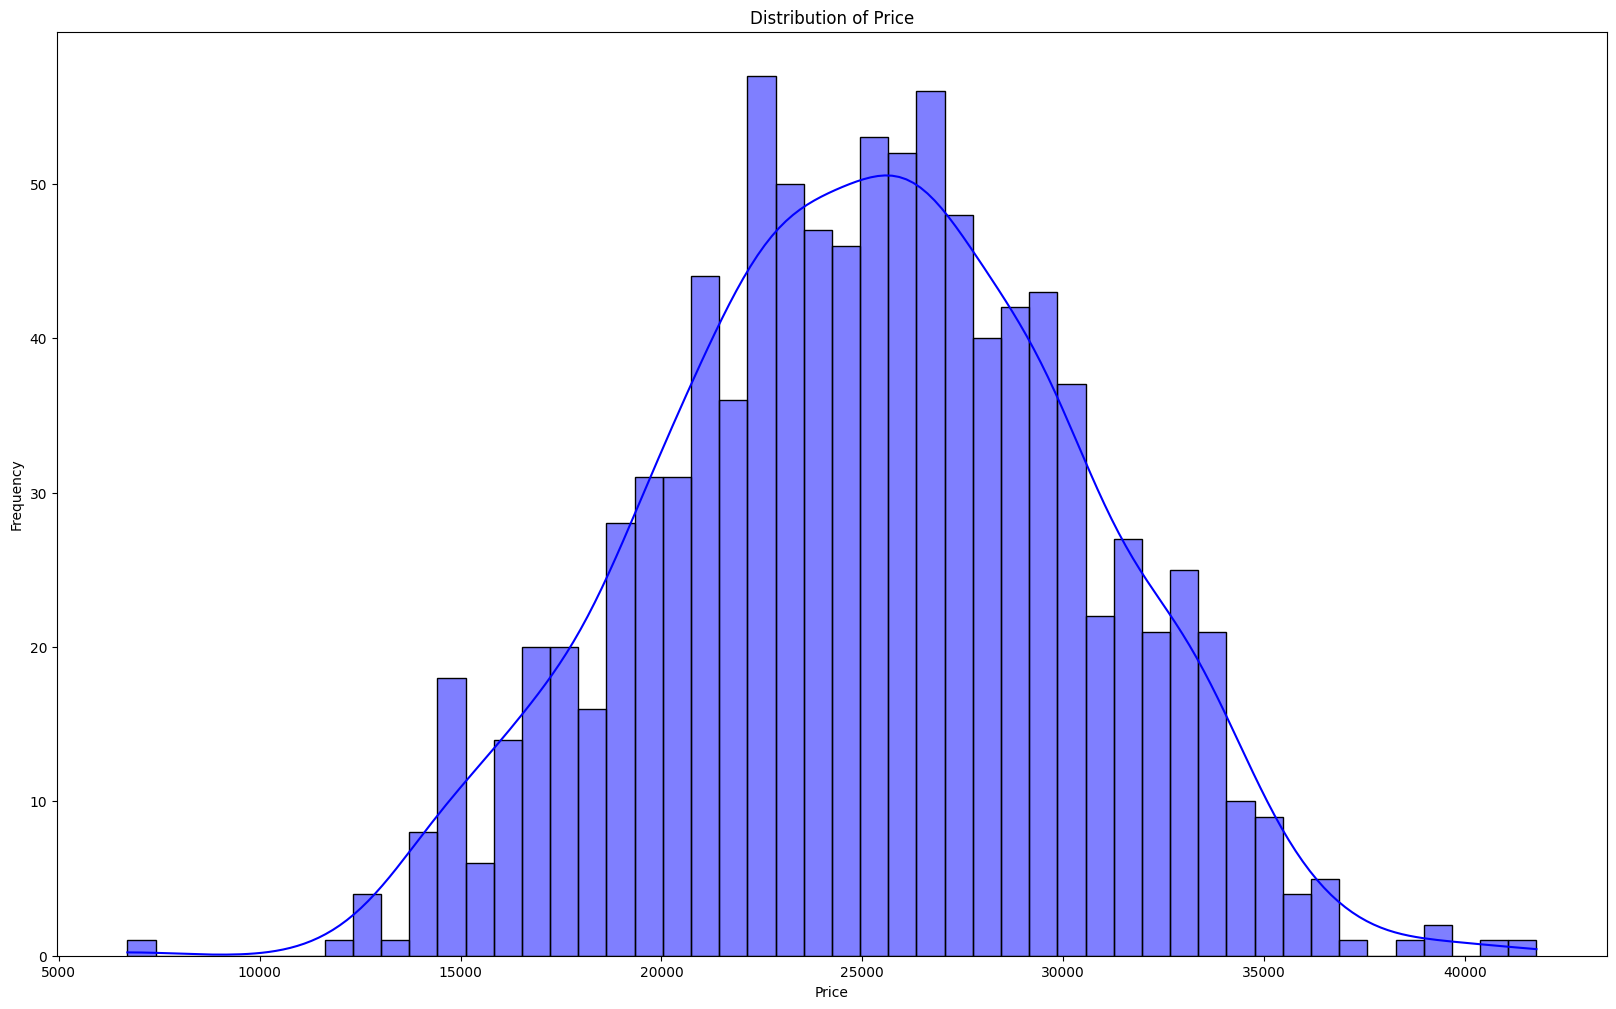

In [47]:
# Check distribution of the target variable
plt.figure(figsize=(20, 12))
sns.histplot(data['Price'], kde=True, color='blue', bins=50)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [48]:
correlation_matrix = data.corr(numeric_only=True)

In [49]:
correlation_matrix

,Year,Engine Size,Mileage,Price
Year,1.000000,-0.012190,0.016376,0.609631
Engine Size,-0.012190,1.000000,-0.014815,0.383951
Mileage,0.016376,-0.014815,1.000000,-0.556560
Price,0.609631,0.383951,-0.556560,1.000000


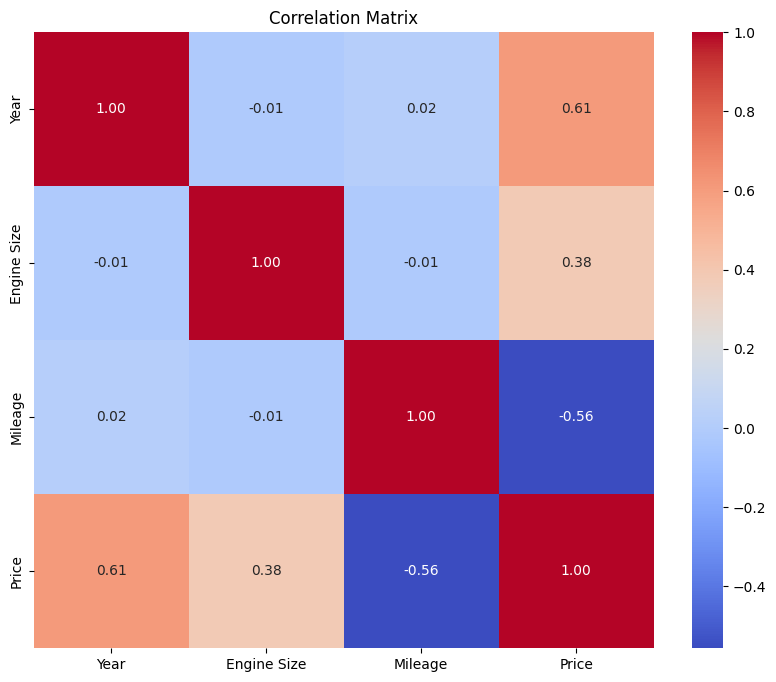

In [50]:
# Check correlations between numeric variables
correlation_matrix = data.corr(numeric_only=True)

# Visualize the correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [51]:
# One-hot encoding for categorical column
encoder = OneHotEncoder(sparse_output=False)
encoded_df = pd.DataFrame(encoder.fit_transform(data[['Make']]), columns=encoder.get_feature_names_out(['Make']))
numeric_data = data.select_dtypes(include=['float64', 'int64'])
all_data = pd.concat([numeric_data, encoded_df], axis=1)

In [52]:
# Now calculate correlations again
correlation_matrix = all_data.corr()

In [53]:
# Check Null Values
all_data.isnull().values.any()

np.False_

In [54]:
# Check for missing values
missing_values = all_data.isnull().sum()

In [55]:

missing_values

,0
Year,0
Engine Size,0
Mileage,0
Price,0
Make_Audi,0
Make_BMW,0
Make_Ford,0
Make_Honda,0
Make_Toyota,0


In [56]:
all_data.shape

(1000, 9)

In [57]:
len(all_data.columns)

9

In [58]:
all_data.describe()

,Year,Engine Size,Mileage,Price,Make_Audi,Make_BMW,Make_Ford,Make_Honda,Make_Toyota
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2010.688000,2.798300,97192.48700,25136.615530,0.212000,0.178000,0.225000,0.198000,0.187000
std,6.288577,1.024137,59447.31576,5181.401368,0.408929,0.382704,0.417791,0.398692,0.390107
min,2000.000000,1.000000,56.00000,6704.953524,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2005.000000,1.900000,44768.75000,21587.878370,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2011.000000,2.800000,94411.50000,25189.325247,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,3.700000,148977.75000,28806.368974,0.000000,0.000000,0.000000,0.000000,0.000000
max,2021.000000,4.500000,199867.00000,41780.504635,1.000000,1.000000,1.000000,1.000000,1.000000


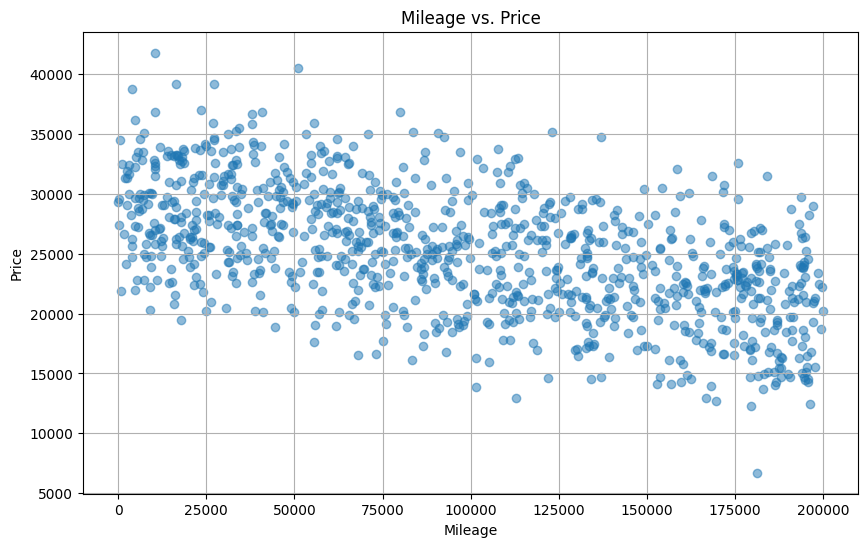

In [59]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Mileage'], data['Price'], alpha=0.5)
plt.title('Mileage vs. Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [60]:
# Define bin edges for mileage based on the distribution observed in the histogram
mileage_bins = [0, 50000, 100000, 150000, 200000]

# Create a new column 'Mileage_Range' by binning the 'Mileage' column
data['Mileage_Range'] = pd.cut(data['Mileage'], bins=mileage_bins, right=False)

# Display the first few rows to verify the new column
data.head()

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price,Mileage_Range
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931,"[50000, 100000)"
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684,"[50000, 100000)"
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347,"[50000, 100000)"
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491,"[50000, 100000)"
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657,"[100000, 150000)"


In [61]:
average_price_by_range = data.groupby('Mileage_Range')['Price'].mean()
display(average_price_by_range)

/tmp/ipython-input-1656188933.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_price_by_range = data.groupby('Mileage_Range')['Price'].mean()


,Price
Mileage_Range,
"[0, 50000)",28666.122824
"[50000, 100000)",26208.712980
"[100000, 150000)",23831.330872
"[150000, 200000)",21257.619364


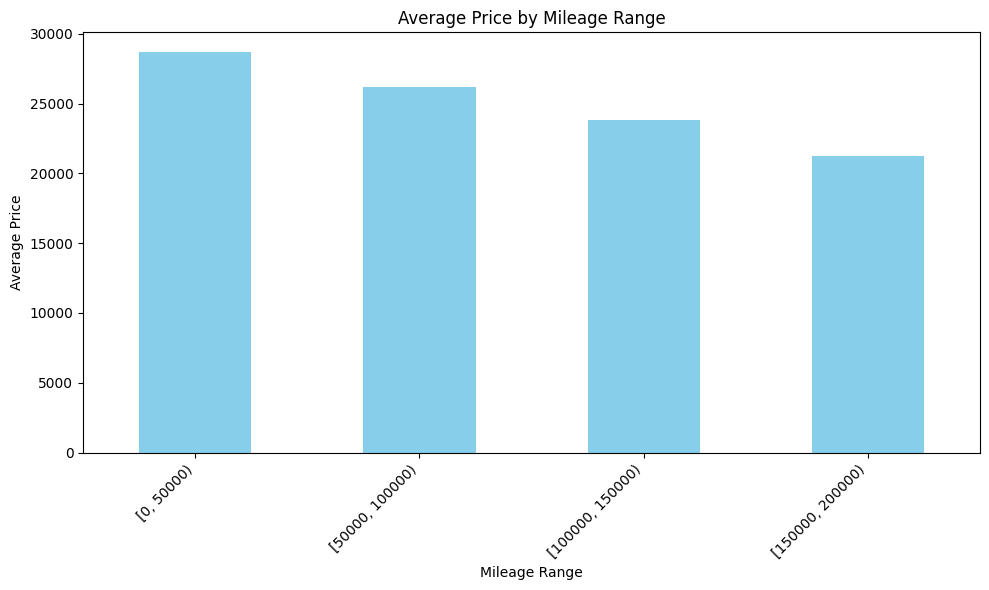

In [62]:
plt.figure(figsize=(10, 6))
average_price_by_range.plot(kind='bar', color='skyblue')
plt.title('Average Price by Mileage Range')
plt.xlabel('Mileage Range')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [63]:
# Prepare the features (X) and target (y)
X = all_data.drop(columns=['Price'])
y = all_data['Price']

In [64]:
# Step 4: Normalize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [65]:
# Step 5: Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [66]:
# Model Without Optimization


# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_lr = linear_model.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"MAE: {mae_lr}, MSE: {mse_lr}, RMSE: {rmse_lr}, MAPE: {mape_lr}, R²: {r2_lr}")

MAE: 1790.0861893197048, MSE: 4895047.051578211, RMSE: 2212.475322252931, MAPE: 0.07599511014259014, R²: 0.8211311663346552


In [67]:
# Linear Regression (fit_intercept)
param_grid_linear = {'fit_intercept': [True, False]}
grid_search_lr = GridSearchCV(LinearRegression(), param_grid_linear, cv=5, scoring='neg_mean_absolute_error')
grid_search_lr.fit(X_train, y_train)
y_pred_lr_opt = grid_search_lr.best_estimator_.predict(X_test)

mae_lr_opt = mean_absolute_error(y_test, y_pred_lr_opt)
mse_lr_opt = mean_squared_error(y_test, y_pred_lr_opt)
rmse_lr_opt = np.sqrt(mse_lr_opt)
mape_lr_opt = mean_absolute_percentage_error(y_test, y_pred_lr_opt)
r2_lr_opt = r2_score(y_test, y_pred_lr_opt)
print(f"MAE: {mae_lr_opt}, MSE: {mse_lr_opt}, RMSE: {rmse_lr_opt}, MAPE: {mape_lr_opt}, R²: {r2_lr_opt}")

MAE: 1790.0861893197048, MSE: 4895047.051578211, RMSE: 2212.475322252931, MAPE: 0.07599511014259014, R²: 0.8211311663346552


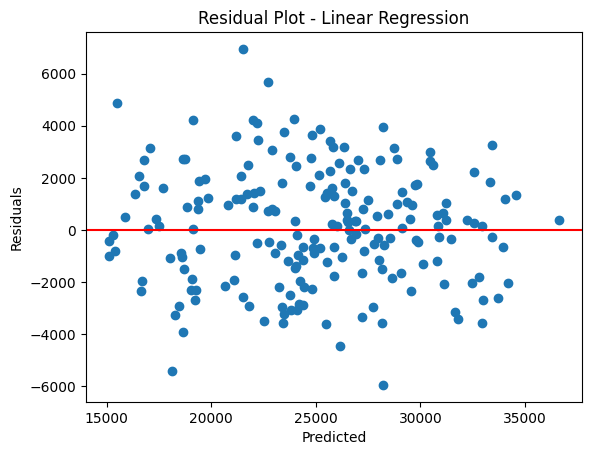

In [68]:
# Visualization

# Residual Plot (Linear Regression)
residuals = y_test - y_pred_lr
plt.scatter(y_pred_lr, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot - Linear Regression")
plt.show()

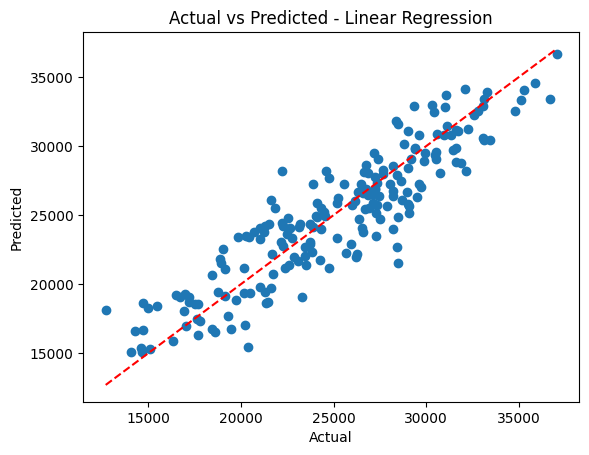

In [69]:
# Actual vs Predicted
plt.scatter(y_test, y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted - Linear Regression")
plt.show()